# Convolutional Neural Network
## Week-7 - 2023

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split


In [ ]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

X_train size:  (50000, 32, 32, 3)
y_train size:  (50000, 1)
X_test size:   (10000, 32, 32, 3)
y_test size:   (10000, 1)


In [ ]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [ ]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# Class names in the CIFAR-10 dataset

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hours',
 'ship',
 'truck']

<function matplotlib.pyplot.show(close=None, block=None)>

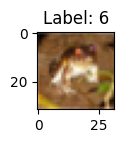

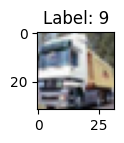

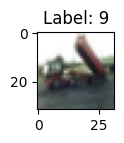

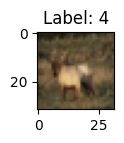

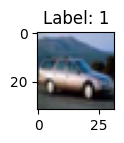

In [ ]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
#
# Your code to display a few images before the model development.
#
#
for i in range(5):
  plt.figure(figsize=(1,1))
  plt.imshow(X_train[i])
  plt.title(f"Label: {y_train[i][0]}")
plt.show

In [ ]:
# Preprocess the data

X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### MLP model

In [ ]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 41s 25ms/step - loss: 1.8651 - accuracy: 0.3289
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6726 - accuracy: 0.4017
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5842 - accuracy: 0.4347
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5333 - accuracy: 0.4524
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4962 - accuracy: 0.4632
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4638 - accuracy: 0.4763
Epoch 7/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4453 - accuracy: 0.4835
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4189 - accuracy: 0.4926
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3932 - accuracy: 0.5019
Epoch 10/10
1563/1563 [==============================] - 34s 22m

<ipython-input-12-1ec4f8fba4bc>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


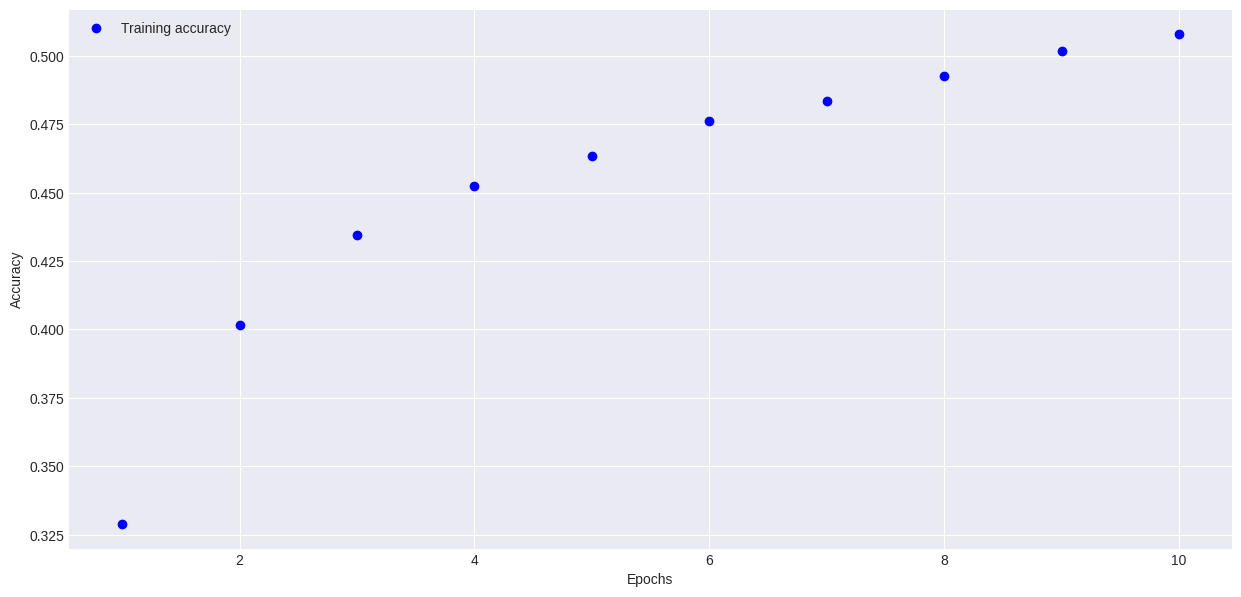

In [ ]:
 # Print the training process graph and result

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# evaluation - Accuracy result on the Test set

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 46.12%


### CNN model

In [ ]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5145 - accuracy: 0.4504
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1595 - accuracy: 0.5896
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0101 - accuracy: 0.6444
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9114 - accuracy: 0.6802
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8398 - accuracy: 0.7050
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7859 - accuracy: 0.7243
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7313 - accuracy: 0.7420
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6891 - accuracy: 0.7575
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6504 - accuracy: 0.7705
Epoch 10/10
1563/1563 [==============================] - 59s 38m

<ipython-input-17-25613f853744>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


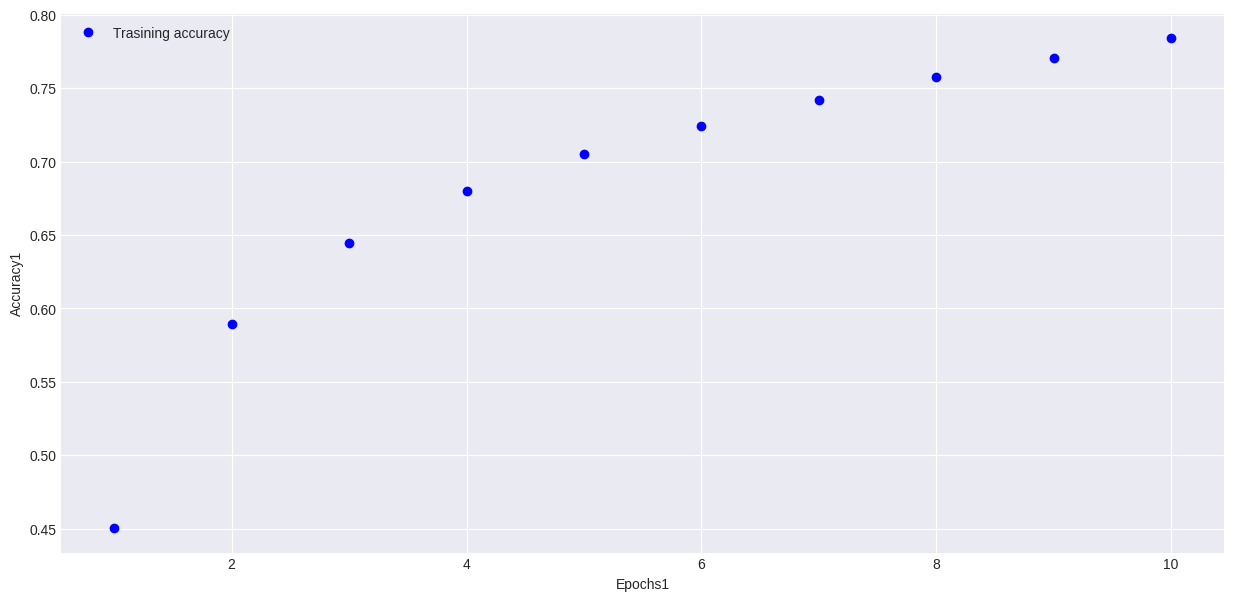

In [ ]:
# Your code to print the CNN training process graph and result
#
#
#
history_dict1 = history2.history
plt.style.use('seaborn-darkgrid')

acc_values2 = history_dict1['accuracy']
epochs1 = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs1, acc_values2, 'bo', label='Trasining accuracy')
plt.xlabel('Epochs1')
plt.ylabel('Accuracy1')
plt.legend()

plt.show()

In [ ]:
# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 69.25%


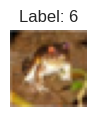

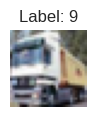

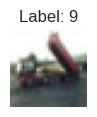

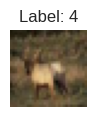

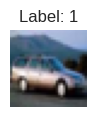

In [ ]:
# Display a few images after CNN model development

for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [ ]:
# Your code to do the above activity.
# Hint - import time
#
#
#
import time
from keras.optimizers import  Adafactor,Nadam,Ftrl
from keras.utils import to_categorical

In [ ]:
# Your code to do the above activity.
# Hint - Put name of optimizers
#
#
optimizers = [Adafactor(),Nadam(),Ftrl()]


In [ ]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists
#
#

training_times = []
histories = []
accuracies=[]
#

In [ ]:
  # Your code to do the above activity.
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.
#
#
#
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
# Your code to do the above activity.
# Hint - use loops for use different optimizers
for optimizer in optimizers:
    model = create_cnn_model()  # Create a new model for each optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), verbose=1)
    end_time = time.time()
    histories.append(history)
    training_times.append(end_time - start_time)
    accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)


Epoch 1/3
1563/1563 [==============================] - 57s 36ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/3
1563/1563 [==============================] - 57s 37ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/3
1563/1563 [==============================] - 55s 35ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 1/3
1563/1563 [==============================] - 63s 39ms/step - loss: 1.4077 - accuracy: 0.4957 - val_loss: 1.1838 - val_accuracy: 0.5860
Epoch 2/3
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0821 - accuracy: 0.6215 - val_loss: 1.0499 - val_accuracy: 0.6367
Epoch 3/3
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9553 - accuracy: 0.6676 - val_loss: 0.9817 - val_accuracy: 0.6597
Epoch 1/3
1563/1563 [==============================] - 57s 36ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epo

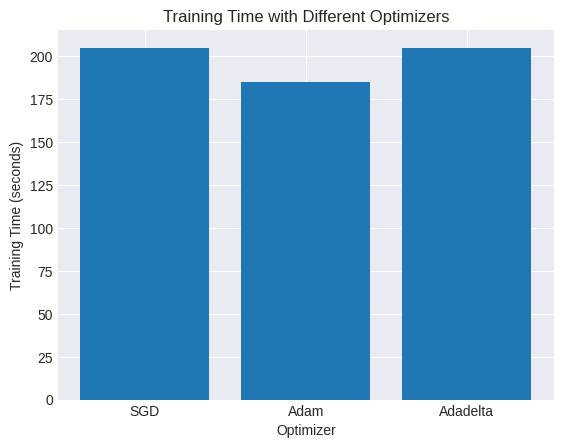

In [ ]:
# Your code to do the above activity.
# Generate a bar plot to compare training times
#
#
optimizer_names = ["SGD", "Adam", "Adadelta"]
plt.bar(optimizer_names, training_times)
plt.ylabel('Training Time (seconds)')
plt.xlabel('Optimizer')
plt.title('Training Time with Different Optimizers')
plt.show()


Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [ ]:
# Print accuracies achieved with different optimizers
for i, optimizer in enumerate(optimizers):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracy * 100:.2f}%")

<keras.src.optimizers.adafactor.Adafactor object at 0x780be46abb20> Optimizer - Test Accuracy: 10.00%
<keras.src.optimizers.nadam.Nadam object at 0x780be46bf610> Optimizer - Test Accuracy: 10.00%
<keras.src.optimizers.ftrl.Ftrl object at 0x780be46abd00> Optimizer - Test Accuracy: 10.00%


In [ ]:
# Your code to
# Find and print the highest achieved accuracy
#
print("Adam Optimizer")

Adam Optimizer
